# **Banking Marketing Campaign**

**Business Insight**

Long-term deposits allow banks to hold money for a specific period of time, allowing the bank to use that money to enhance its investments. Marketing campaigns for this product are based on phone calls. If a user is not available at a given time, then they will be called back at another time.

**Description of the problem**

The Portuguese bank is experiencing a decline in revenue, so they want to be able to identify existing customers who are more likely to take out a long-term deposit. This will allow the bank to focus their marketing efforts on those customers and avoid wasting money and time on customers who are unlikely to sign up.

To address this problem we will create a ranking algorithm to help predict whether or not a customer will sign up for a long-term deposit.

### **Exploratory Data Analysis (EDA)**

###  **Importing Libraries**

In [91]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV

###  **Problem statement and data collection**

In [3]:
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep=";")
total_data.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### **Exploration and data cleaning**

**Understanding the features**

* **age:** Age of customer (numeric)

* **job:** Type of job (categorical)

* **marital:** Marital status (categorical)

* **education:** Level of education (categorical)

* **default:** Do you currently have credit (categorical)

* **housing:** Do you have a housing loan (categorical)

* **loan:** Do you have a personal loan? (categorical)

* **contact:** Type of contact communication (categorical)

* **month:** Last month in which you have been contacted (categorical)

* **day_of_week:** Last day on which you have been contacted (categorical)

* **duration:** Duration of previous contact in seconds (numeric)

* **campaign:** Number of contacts made during this campaign to the customer (numeric)

* **pdays:** Number of days that elapsed since the last campaign until the customer was contacted (numeric)

* **previous:** Number of contacts made during the previous campaign to the customer (numeric)

* **poutcome:** Result of the previous marketing campaign (categorical)

* **emp.var.rate:** Employment variation rate. Quarterly indicator (numeric)

* **cons.price.idx:** Consumer price index. Monthly indicator (numeric)

* **cons.conf.idx:** Consumer confidence index. Monthly indicator (numeric)

* **euribor3m:** EURIBOR 3-month rate. Daily indicator (numeric)

* **nr.employed:** Number of employees. Quarterly indicator (numeric)

* **y**: TARGET. Whether the customer takes out a long-term deposit or not (categorical)

In [4]:
print('The dataframe contains {} rows and it has {} features.'.format(len(total_data), total_data.shape[1]))

The dataframe contains 41188 rows and it has 21 features.


In [5]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Conclusions

- The dataset contains 41,188 rows and 21 columns.

- There are no missing values (Non-Null Count matches total entries for all columns).

- The dataset includes a mix of categorical, integer, and floating-point numerical variables.

**Eliminate duplicates**

In [6]:
total_data.isna().sum()[total_data.isna().sum()>0]

Series([], dtype: int64)

Conclusions:

The dataset don't have any nulls neither duplicated values in the dataframe and we have categorical and numerical features.

**Eliminate irrelevant information**

In [7]:
total_data.drop(["contact", "day_of_week", "month", "duration", "nr.employed", "previous", "pdays", "campaign"], axis = 1, inplace = True)
total_data.head(3)

,age,job,marital,education,default,housing,loan,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,no,nonexistent,1.1,93.994,-36.4,4.857,no
1,57,services,married,high.school,unknown,no,no,nonexistent,1.1,93.994,-36.4,4.857,no
2,37,services,married,high.school,no,yes,no,nonexistent,1.1,93.994,-36.4,4.857,no


In [8]:
clean_data = total_data.copy()
clean_data.head(3)

,age,job,marital,education,default,housing,loan,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,no,nonexistent,1.1,93.994,-36.4,4.857,no
1,57,services,married,high.school,unknown,no,no,nonexistent,1.1,93.994,-36.4,4.857,no
2,37,services,married,high.school,no,yes,no,nonexistent,1.1,93.994,-36.4,4.857,no


### **Analysis of univariate variables**

Dividing our dataset into categorial and numerical.

**Categorical Variables - Analysis and Conclusions**

In [9]:
categorical_variables = clean_data.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical Variables:", categorical_variables)

Categorical Variables: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome', 'y']


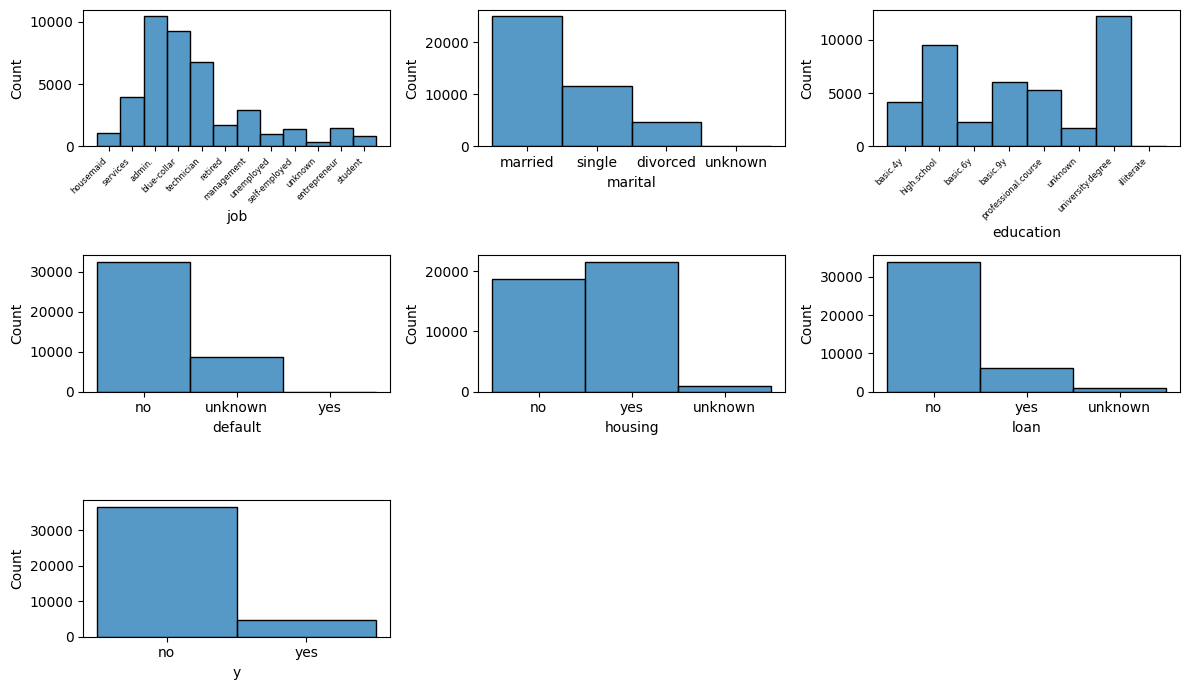

In [10]:
fig, axis = plt.subplots(3, 3, figsize=(12,7)) 


sns.histplot(ax = axis[0,0], data = clean_data, x = "job")
sns.histplot(ax = axis[0,1], data = clean_data, x = "marital")
sns.histplot(ax = axis[0,2], data = clean_data, x = "education")
sns.histplot(ax = axis[1,0], data = clean_data, x = "default")
sns.histplot(ax = axis[1,1], data = clean_data, x = "housing")
sns.histplot(ax = axis[1,2], data = clean_data, x = "loan")
sns.histplot(ax = axis[2,0], data = clean_data, x = "y")

fig.delaxes(axis[2, 1])
fig.delaxes(axis[2, 2])

plt.setp(axis[0,0].get_xticklabels(), rotation=45, ha='right', size=6)
plt.setp(axis[0,2].get_xticklabels(), rotation=45, ha='right', size=6)

plt.tight_layout()
plt.show()

Conclusions

- The most predominant jobs are admin, blue-collar, and technician.
- Regarding marital status, "married" leads, representing more than half of the users, followed by "single" in second place and "divorced" in third. There is a nearly negligible number of unknown statuses.
- In terms of education, the campaign outcome reached more people with a university degree, followed by those with a high school education, while professional, middle, and no education levels show a similar but lower volume compared to the former.
- The number of people without a default stands out significantly, representing more than two-thirds of the total.
- On the other hand, the number of people with a housing loan remains quite close between those who have one and those who don't, with a slightly higher proportion of individuals who do have one. We also observe a very small percentage of people for whom it's unknown whether they have a housing loan or not.
- In the same line as before, people without a personal loan dominate the segmentation, making up almost the entire group. The number of individuals with a personal loan does not exceed one-third, and there is a minimal number for whom their credit status is unknown.
- Finally, we analyzed the target variable. The chart shows that the vast majority of individuals chose not to subscribe to the long-term deposit service.

The demographic and financial profiles reveal that the bank's customer base is largely composed of married individuals with stable jobs and higher education levels. Most clients do not hold personal or default loans, while housing loan ownership is more balanced. However, despite these favorable characteristics, the majority of customers did not subscribe to the long-term deposit service, indicating that other factors beyond basic demographics and credit status may influence the success of marketing campaigns.

**Numerical Variables - Analysis and Conclusions**

In [11]:
numerical_variables = clean_data.select_dtypes(include=['number']).columns.tolist()
print("Numerical Variables:", numerical_variables)

Numerical Variables: ['age', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']


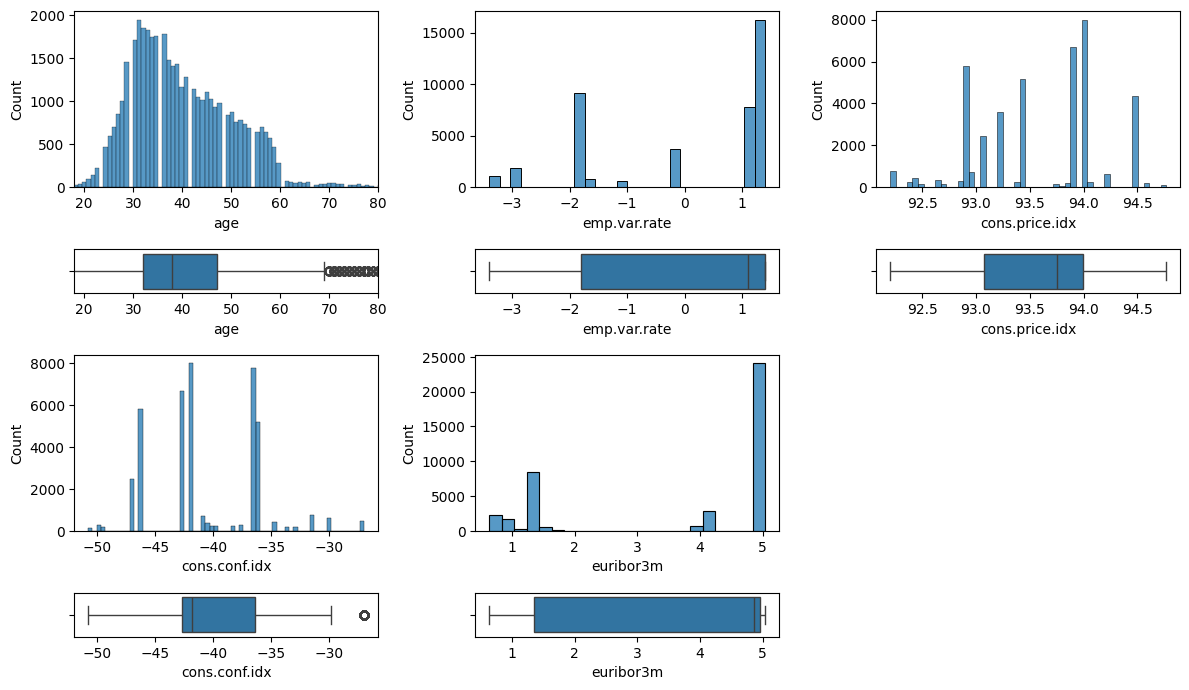

In [12]:
fig, axis = plt.subplots(4, 3, figsize = (12, 7), gridspec_kw = {"height_ratios": [4, 1, 4, 1]})

sns.histplot(ax = axis[0, 0], data = clean_data, x = "age").set_xlim(18, 80)
sns.boxplot(ax = axis[1, 0], data = clean_data, x = "age").set_xlim(18, 80)

sns.histplot(ax = axis[0, 1], data = clean_data, x = "emp.var.rate")
sns.boxplot(ax = axis[1, 1], data = clean_data, x = "emp.var.rate")

sns.histplot(ax = axis[0, 2], data = clean_data, x = "cons.price.idx")
sns.boxplot(ax = axis[1, 2], data = clean_data, x = "cons.price.idx")

sns.histplot(ax = axis[2, 0], data = clean_data, x = "cons.conf.idx")
sns.boxplot(ax = axis[3, 0], data = clean_data, x = "cons.conf.idx")

sns.histplot(ax = axis[2, 1], data = clean_data, x = "euribor3m")
sns.boxplot(ax = axis[3, 1], data = clean_data, x = "euribor3m")

fig.delaxes(axis[2, 2])
fig.delaxes(axis[3, 2])

plt.tight_layout()
plt.show()

Conclusions

1.Age:

- Most clients are aged 30–40. Some outliers exist above 70.

- The target audience is middle-aged. A more tailored approach may work better for younger or older outliers.

2.emp.var.rate (Employment Variation Rate):

- Mostly centered around 1.1, few negative values.

- The campaign likely occurred during a generally stable or slightly positive economic period, but negative values could be tied to hesitancy in client responses.

3.cons.price.idx (Consumer Price Index):

- Distribution is tight, concentrated around 93–94.

- Not much variance here—this might not be a strong predictor on its own.

4.cons.conf.idx (Consumer Confidence Index):

- Highly negative with some outliers.

- Low confidence might explain some clients' reluctance to subscribe. Strong potential as a predictive feature.

5.euribor3m (3-month Euribor Rate):

- Strong peak around 5.0.

- High Euribor rates may discourage subscriptions due to unfavorable economic conditions.

### **Multivariate Analysis**

**- Categorical vs Categorical Analysis**

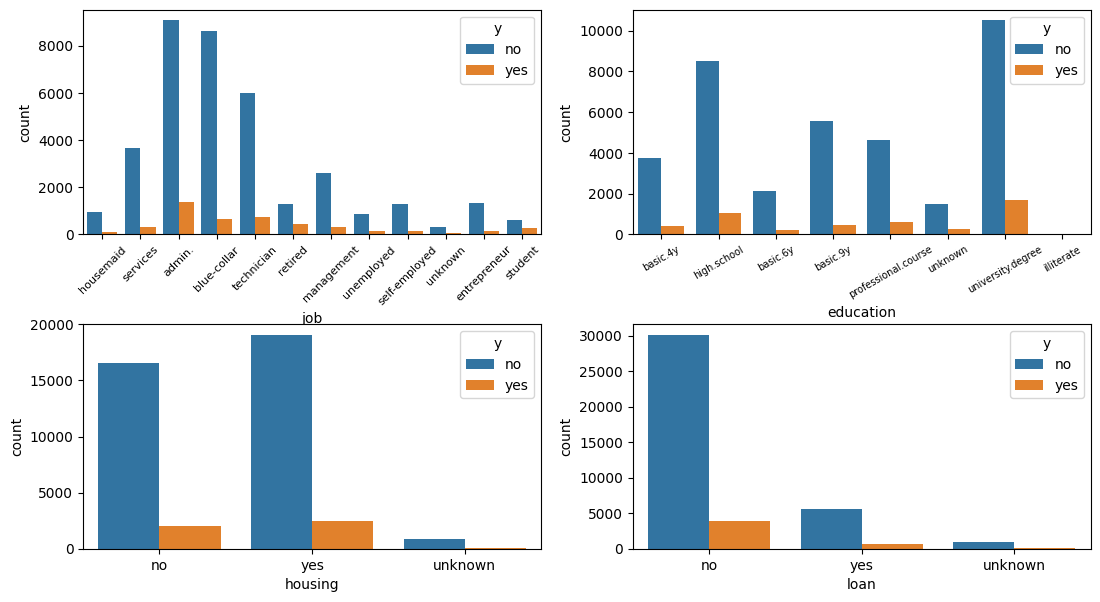

In [13]:
fig, axis = plt.subplots(2,2, figsize = (13, 7))

sns.countplot(x="job", hue="y", data= clean_data, ax = axis[0,0]).tick_params(axis="x",rotation=45, labelsize=8 )
sns.countplot(x="education", hue="y", data= clean_data, ax = axis[0,1]).tick_params(axis="x",rotation=30, labelsize=7 )
sns.countplot(x="housing", hue="y", data= clean_data, ax = axis[1,0])
sns.countplot(x="loan", hue="y", data= clean_data, ax = axis[1,1])

fig.subplots_adjust(hspace=0.4, wspace=0.2)
plt.show()

Conclusions 

These countplots show the distribution of the target variable y (yes/no) across various categorical variables.

1. Job vs y:

- Admin., technician, and blue-collar jobs dominate in count.

- Students and retired clients have a higher proportion of yes responses compared to others and they are more likely to subscribe to the product.


2. Education vs y:

- Clients with a university degree or professional course show a higher subscription rate (yes).

- Education level seems positively correlated with subscription likelihood, possibly due to better financial literacy or product understanding.

3. Housing vs y:

- Slightly more people without housing loans said yes compared to those with.

- Clients without a housing loan might be more financially flexible and open to new financial products.

4. Loan vs y:

- Most people without personal loans responded no, but those with loans showed a slightly higher proportion of yes.

The cross-variable comparisons reveal valuable behavioral insights. Employment type and life stage significantly impact subscription likelihood—students and retirees, despite their lower counts, are more inclined to accept the offer, suggesting motivation tied to future planning or financial security. Higher education correlates positively with product uptake, likely due to increased awareness and confidence in financial decisions. Clients without housing loans show greater subscription rates, possibly reflecting more disposable income or fewer long-term obligations. Interestingly, those with personal loans also showed slightly higher acceptance, hinting that clients already engaged in financial products may be more receptive to new ones. Overall, these patterns suggest that targeting specific profiles—like educated retirees or financially flexible clients—could improve campaign effectiveness.


**- Numerical vs Numerical Analysis**

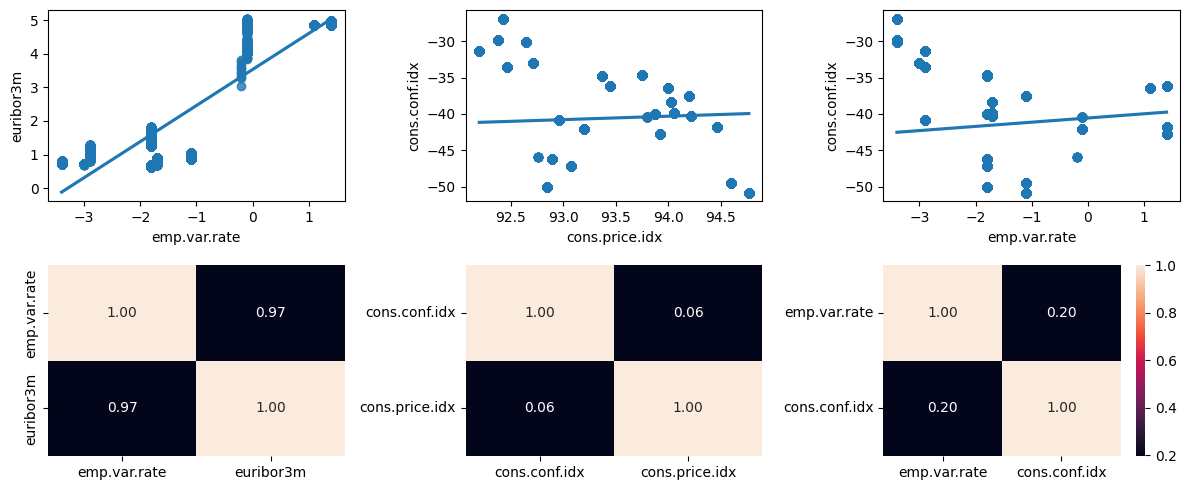

In [17]:
fig, axis = plt.subplots(2,3 , figsize = (12, 5))

sns.regplot(ax = axis[0, 0], data = clean_data, x = "emp.var.rate", y = "euribor3m")
sns.heatmap(clean_data[["emp.var.rate", "euribor3m"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = clean_data, x = "cons.price.idx", y = "cons.conf.idx")
sns.heatmap(clean_data[["cons.conf.idx", "cons.price.idx"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(ax = axis[0, 2], data = clean_data, x = "emp.var.rate", y = "cons.conf.idx")
sns.heatmap(clean_data[["emp.var.rate", "cons.conf.idx"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2]).set(ylabel = None)


plt.tight_layout()

plt.show()

Conclusions

1.emp.var.rate vs euribor3m

- A correlation of 0.97 implies that as the employment variation rate increases, the Euribor rate also increases—almost perfectly in sync.

2.cons.conf.idx vs cons.price.idx

- A 0.6 correlation means that when the price index increases, the confidence index tends to increase as well, but not perfectly or always  — these variables are related, but they capture different economic dynamics.

3.emp.var.rate vs cons.conf.idx

- A correlation of 0.20 suggests that as employment improves, there is a slight tendency for consumer confidence to increase — but this relationship is not strong or consistent.

**- Numerical vs. Categorical Analysis**

In [ ]:
print(categorical_variables)
numerical_variables

['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome', 'y']


['age', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']

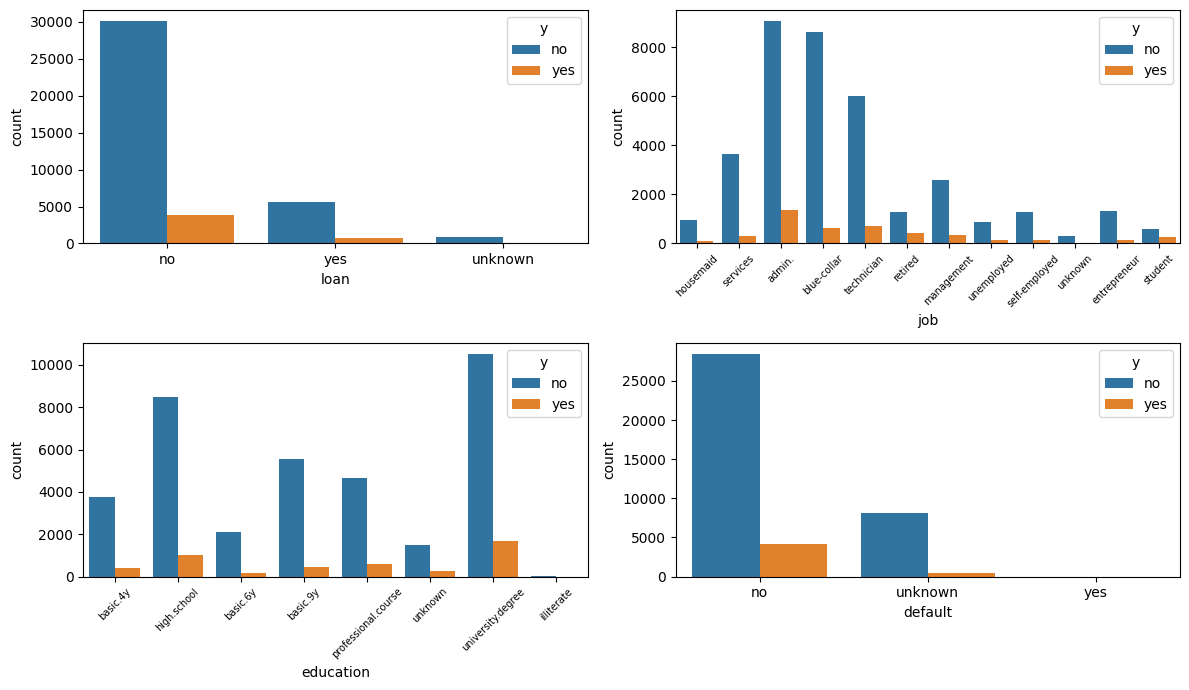

In [ ]:
fig, axis = plt.subplots(2,2, figsize = (12, 7))

sns.countplot(data=total_data, x="loan", hue="y", ax=axis[0, 0])
sns.countplot(data=total_data, x="job", hue="y", ax=axis[0, 1]).tick_params(axis="x",rotation=45, labelsize=7 )
sns.countplot(data=total_data, x="education", hue="y", ax=axis[1, 0]).tick_params(axis="x",rotation=45, labelsize=7 )
sns.countplot(data=total_data, x="default", hue="y", ax=axis[1, 1])


fig.subplots_adjust(hspace=0.4, wspace=0.2)

plt.tight_layout()
plt.show()

Conclusions

These countplots show the distribution of the target variable y (yes/no) across various categorical variables.

1. Job vs y:

- Admin., technician, and blue-collar jobs dominate in count.

- Students and retired clients have a higher proportion of yes responses compared to others and they are more likely to subscribe to the product.


2. Education vs y
Observation: Clients with a university degree or professional course show a higher subscription rate (yes).

Conclusion: Education level seems positively correlated with subscription likelihood, possibly due to better financial literacy or product understanding.

3. Housing vs y
Observation: Slightly more people without housing loans said yes compared to those with.

Conclusion: Clients without a housing loan might be more financially flexible and open to new financial products.

4. Loan vs y
Observation: Most people without personal loans responded no, but those with loans showed a slightly higher proportion of yes.

Conclusion: There might be financial motivation among those with existing loans to subscribe (perhaps for consolidation or advice).

### **Correlations Analysis**

Factorize categorical values and save it.

In [ ]:
categorical_f_rules = {}

for col in categorical_variables:
    encoded_col = f"{col}_n"
    clean_data[encoded_col], uniques = pd.factorize(clean_data[col])
    dicc = dict(zip(uniques, range(len(uniques))))
    categorical_f_rules[col] = dicc

with open("categorical_rules.json", "w") as f:
    json.dump(categorical_f_rules, f)

with open("categorical_rules.json", "r") as f:
    loaded_mappings = json.load(f)

clean_data.head()

,age,job,marital,education,default,housing,loan,poutcome,emp.var.rate,cons.price.idx,...,euribor3m,y,job_n,marital_n,education_n,default_n,housing_n,loan_n,poutcome_n,y_n
0,56,housemaid,married,basic.4y,no,no,no,nonexistent,1.1,93.994,...,4.857,no,0,0,0,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,nonexistent,1.1,93.994,...,4.857,no,1,0,1,1,0,0,0,0
2,37,services,married,high.school,no,yes,no,nonexistent,1.1,93.994,...,4.857,no,1,0,1,0,1,0,0,0
3,40,admin.,married,basic.6y,no,no,no,nonexistent,1.1,93.994,...,4.857,no,2,0,2,0,0,0,0,0
4,56,services,married,high.school,no,no,yes,nonexistent,1.1,93.994,...,4.857,no,1,0,1,0,0,1,0,0


**Analysing all the Data at Once**

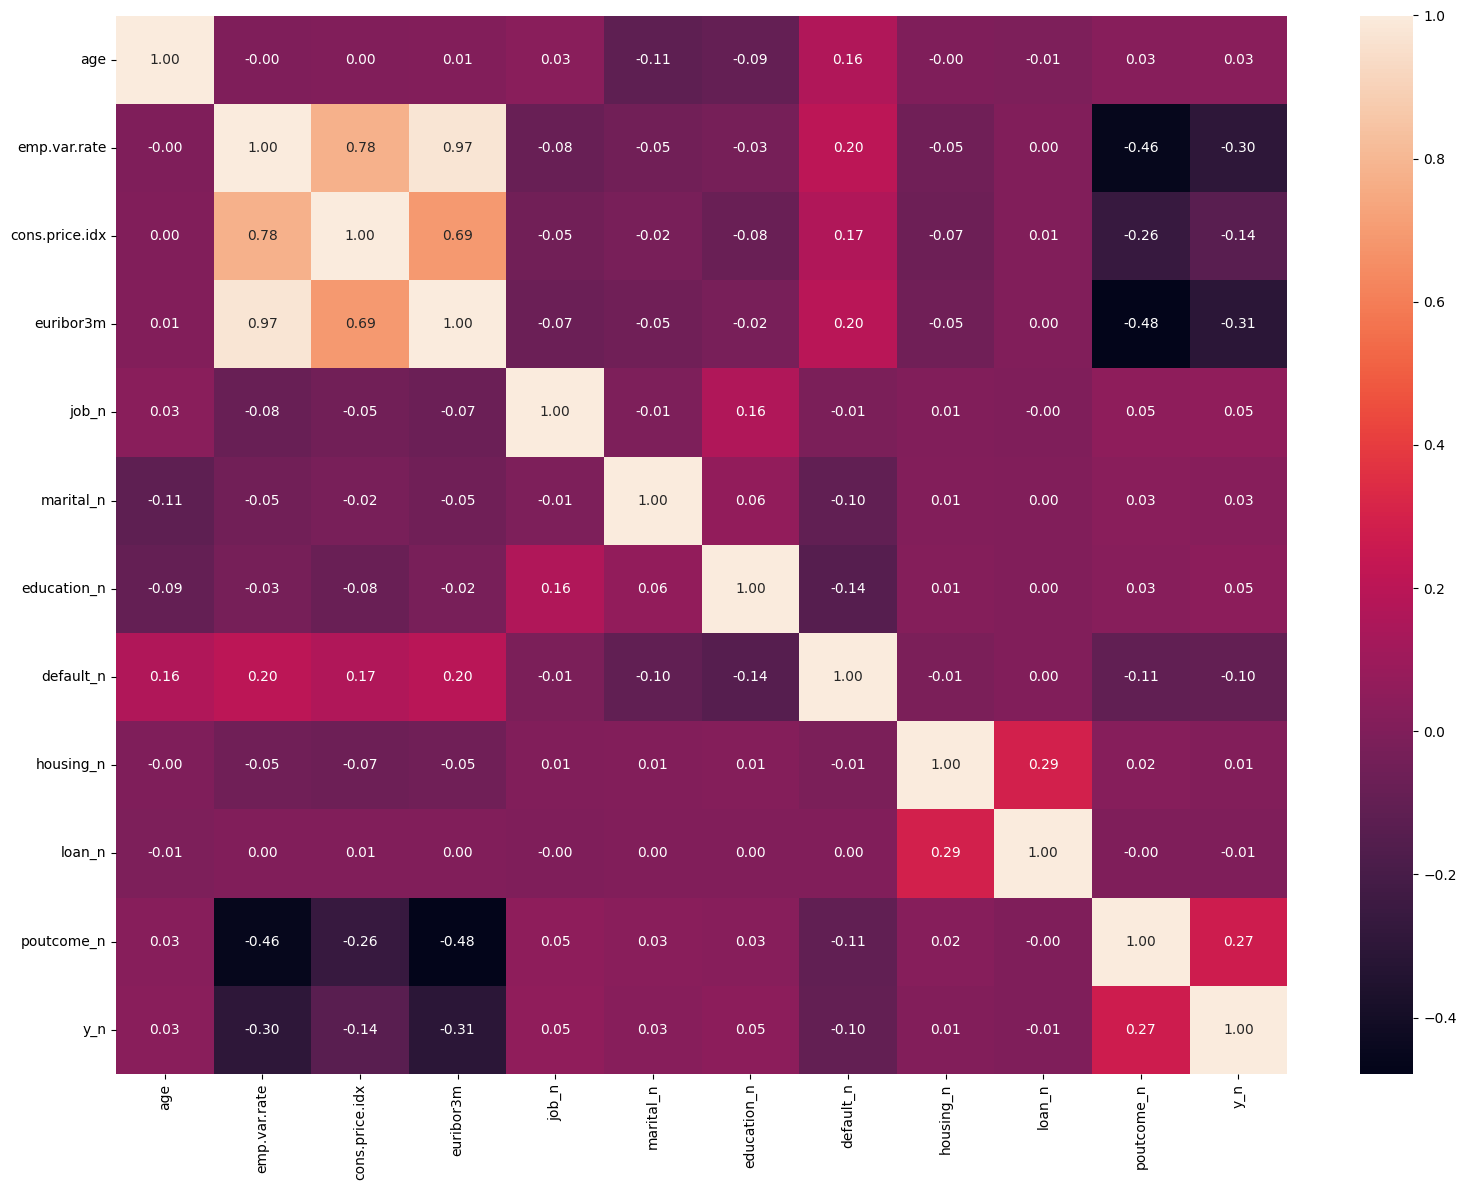

In [22]:
fig, axes = plt.subplots(figsize=(16, 12))

sns.heatmap(clean_data[["age", "emp.var.rate", "cons.price.idx", "euribor3m", "job_n",	"marital_n", "education_n",
                        "default_n", "housing_n", "loan_n", "poutcome_n", "y_n"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()

Conclusions

In the heatmap displaying the correlations between numerical variables — including both original and factorized features — we can identify several strong relationships. Below are the most relevant correlations and their interpretations:

Top Correlations Observed:
- euribor3m & emp.var.rate → 0.97

- euribor3m & nr.employed → 0.95

- nr.employed & emp.var.rate → 0.91

- cons.price.idx & emp.var.rate → 0.78

- euribor3m & cons.price.idx → 0.69

Insights and Conclusions:

- High correlation between euribor3m, emp.var.rate, and nr.employed suggests these three variables are strongly intertwined. When interest rates rise or fall, employment trends and labor volume often follow — indicating that monetary policy and labor markets are closely linked.

- cons.price.idx's correlation with both euribor3m (0.69) and emp.var.rate (0.78) shows that inflation tends to move in sync with employment trends and interest rates. This is consistent with macroeconomic theory, where changes in employment levels affect consumer demand and prices.

- These strong correlations mostly involve macroeconomic and time-dependent variables, rather than individual behavioral or demographic features. This indicates that external economic conditions — such as employment trends, inflation, and interest rates — may play a significant role in influencing whether a client subscribes to a long-term deposit offer.

Implications for the Marketing Campaign:

This correlation analysis highlights that the broader economic context may have a substantial impact on client decisions. For instance, during periods of:

- High employment variation or falling interest rates, clients may be more inclined to consider long-term deposits due to uncertainty or more favorable conditions.

- Stable or rising inflation, individuals may seek to protect their savings, also making them more receptive to such financial products.

- These findings imply that timing marketing efforts in alignment with macroeconomic indicators could increase the success rate of campaigns.

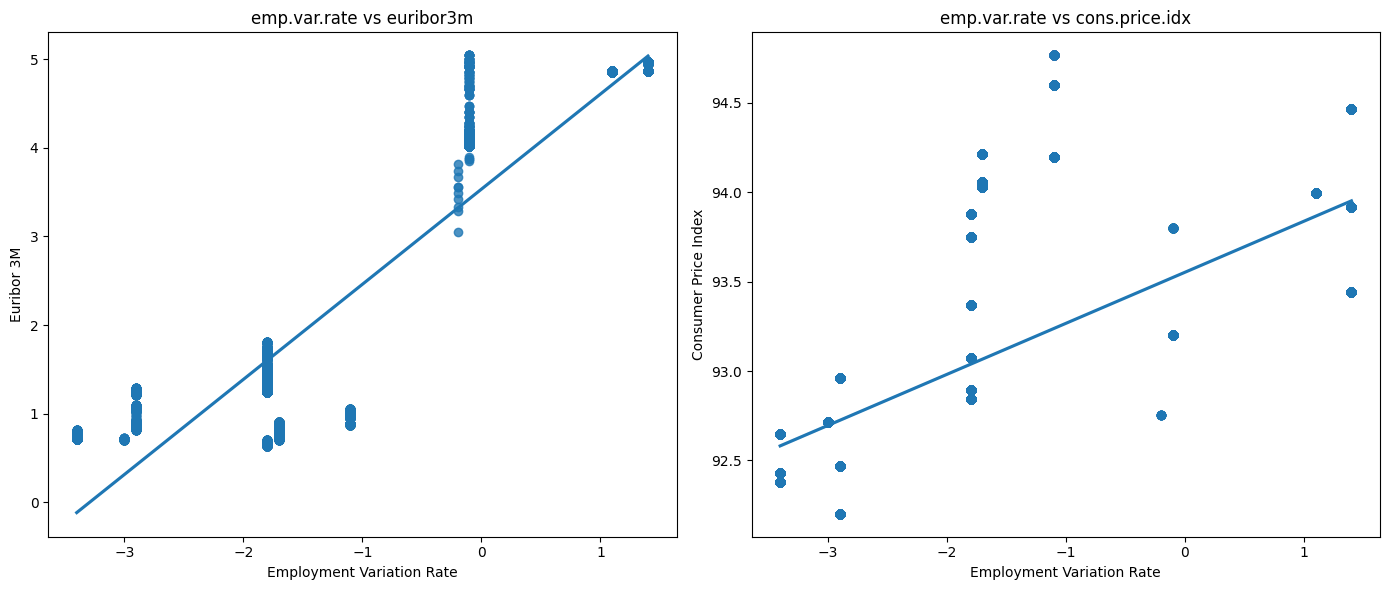

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.regplot(x='emp.var.rate',y='euribor3m',data=clean_data,ax=axes[0])
sns.regplot(x='emp.var.rate',y='cons.price.idx',data=clean_data,ax=axes[1])

axes[0].set_title("emp.var.rate vs euribor3m")
axes[0].set_xlabel("Employment Variation Rate")
axes[0].set_ylabel("Euribor 3M")

axes[1].set_title("emp.var.rate vs cons.price.idx")
axes[1].set_xlabel("Employment Variation Rate")
axes[1].set_ylabel("Consumer Price Index")

plt.tight_layout()
plt.show()


Conclusions

1.emp.var.rate vs euribor3m

- The regression line increases sharply on the right side, indicating that higher positive employment variation is strongly associated with higher Euribor 3-month interest rates.

- Euribor 3-month rates tend to rise when employment conditions improve, highlighting the close macroeconomic link between labor market confidence and interest rate adjustments.

2.emp.var.rate vs cons.price.idx

- This relationship suggests that as employment improves, there's often an increase in consumer prices, likely due to stronger consumer demand and inflationary pressure.

- The dispersion of points suggests that other factors besides employment variation may also influence consumer prices, making the relationship less direct than with Euribor.


**Numerical - Categorical Analysis**

In [ ]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)
sns.regplot(ax = axis[0], data = clean_data, x = "job", y = "neighbourhood_group_n")
sns.regplot(ax = axis[1], data = clean_data, x = "number_of_reviews", y = "neighbourhood_group_n").set(ylabel = None)
plt.tight_layout()
plt.show()

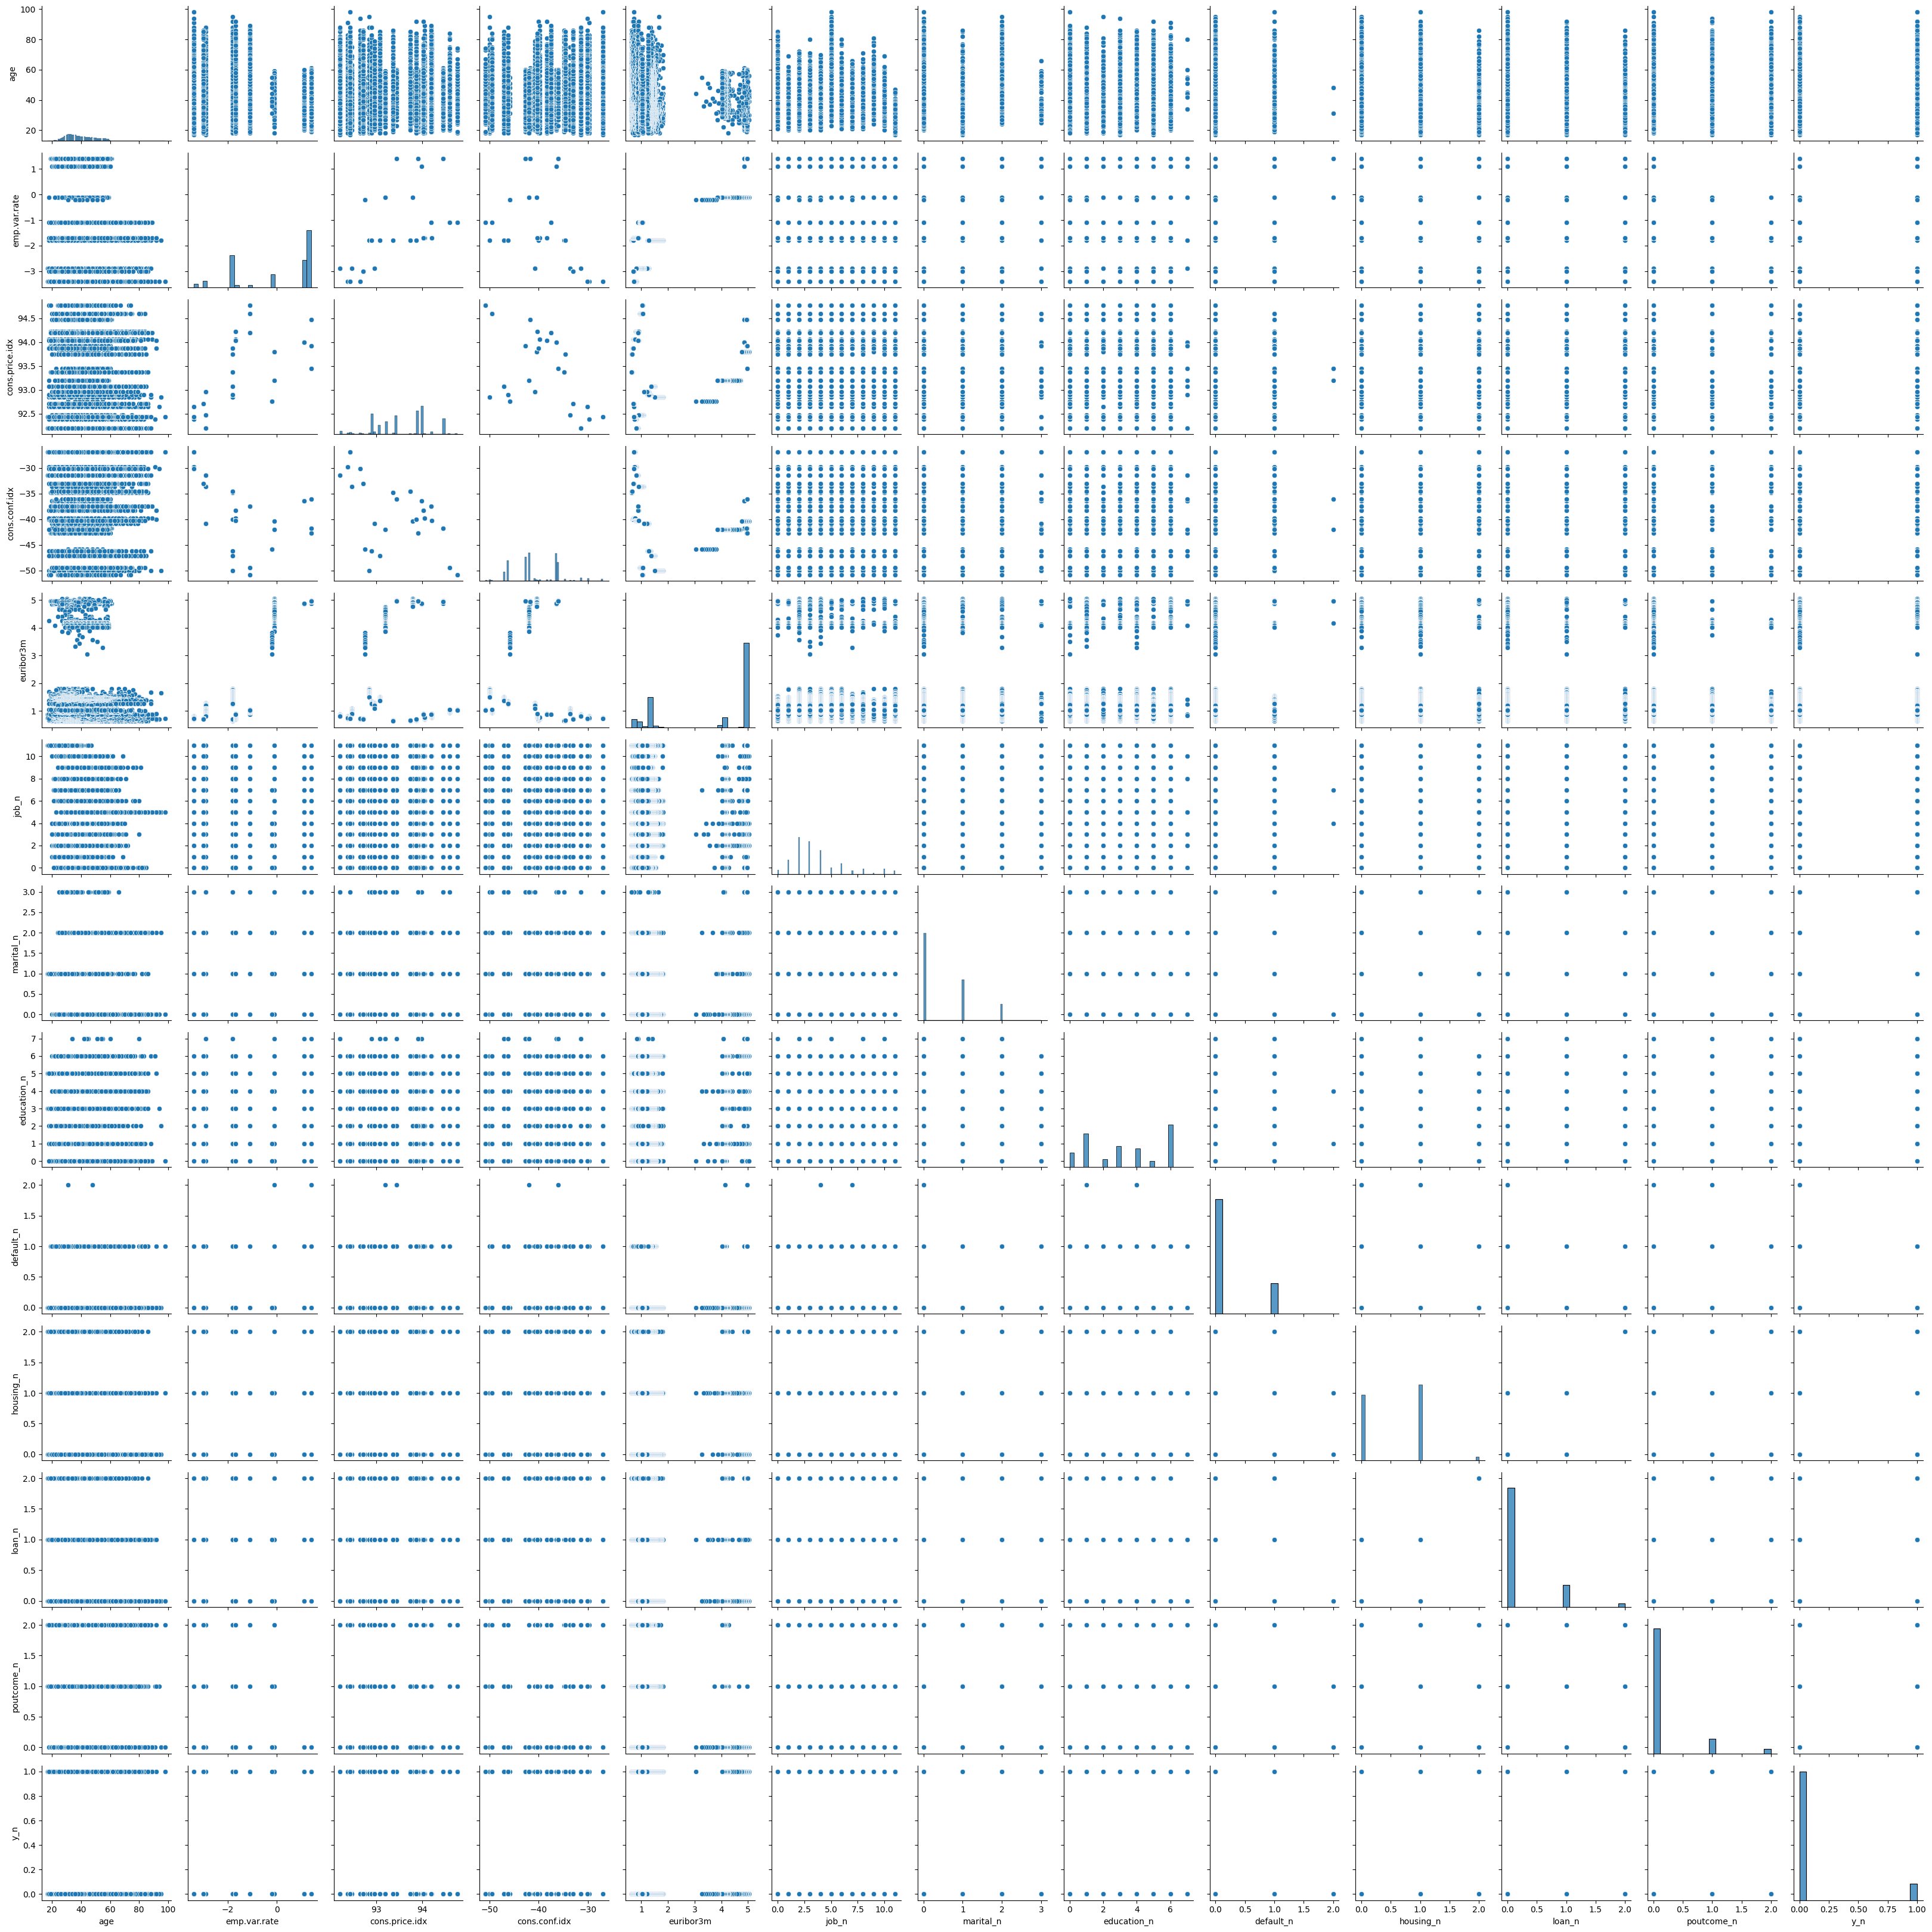

In [23]:
sns.pairplot(data = clean_data)
plt.tight_layout()
plt.show()

### **Feature Engineering**

**- Outliers Analysis**

In [24]:
clean_data.describe()

,age,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,job_n,marital_n,education_n,default_n,housing_n,loan_n,poutcome_n,y_n
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,0.081886,93.575664,-40.502600,3.621291,3.673691,0.510634,3.277532,0.208872,0.571914,0.199767,0.169904,0.112654
std,10.42125,1.570960,0.578840,4.628198,1.734447,2.454116,0.696779,2.185525,0.406686,0.541209,0.456002,0.455754,0.316173
min,17.00000,-3.400000,92.201000,-50.800000,0.634000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,-1.800000,93.075000,-42.700000,1.344000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.00000,1.100000,93.749000,-41.800000,4.857000,3.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,47.00000,1.400000,93.994000,-36.400000,4.961000,4.000000,1.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,98.00000,1.400000,94.767000,-26.900000,5.045000,11.000000,3.000000,7.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [25]:
numerical_variables

['age', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']

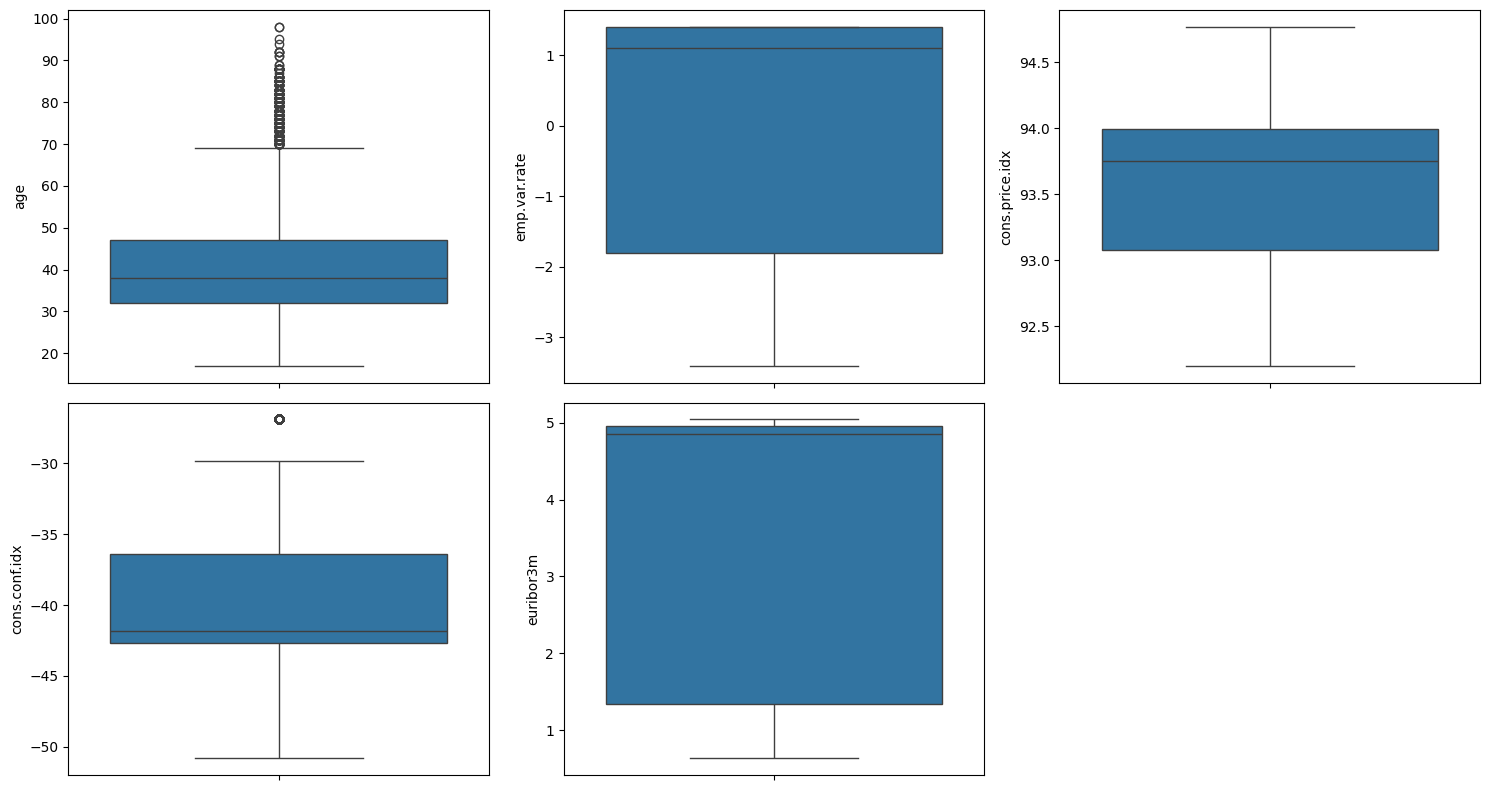

In [29]:
fig, axes = plt.subplots(2, 3, figsize = (15, 8))

sns.boxplot(ax = axes[0, 0], data = clean_data, y = "age")
sns.boxplot(ax = axes[0, 1], data = clean_data, y = "emp.var.rate")
sns.boxplot(ax = axes[0, 2], data = clean_data, y = "cons.price.idx")
sns.boxplot(ax = axes[1, 0], data = clean_data, y = "cons.conf.idx")
sns.boxplot(ax = axes[1, 1], data = clean_data, y = "euribor3m")

axes[1, 2].set_visible(False)

plt.tight_layout()

plt.show()

**Finding Outliers**

In [30]:
numerical_variables

['age', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']

In [ ]:
numerical_columns = [
  "age", 
  "emp.var.rate", 
  "cons.price.idx", 
  "cons.conf.idx", 
  "euribor3m"
  ]

for column in numerical_columns:
    stats = clean_data[column].describe()
    iqr = stats["75%"] - stats["25%"]
    upper_limit = stats["75%"] + 1.5 * iqr
    lower_limit = stats["25%"] - 1.5 * iqr
    if lower_limit < 0:
      lower_limit = 0
    
    outliers = clean_data[(clean_data[column] < lower_limit) | (clean_data[column] > upper_limit)]
    outlier_count = outliers.shape[0]

    print(f"{column.capitalize()} — IQR: {round(iqr, 2)}, Upper limits: {round(upper_limit, 2)}, Lowerlimits: {round(lower_limit, 2)}")
    print(f"Total de outliers: {outlier_count}\n")

Age — IQR: 15.0, Upper limits: 69.5, Lowerlimits: 9.5
Total de outliers: 469

Emp.var.rate — IQR: 3.2, Upper limits: 6.2, Lowerlimits: 0
Total de outliers: 17191

Cons.price.idx — IQR: 0.92, Upper limits: 95.37, Lowerlimits: 91.7
Total de outliers: 0

Cons.conf.idx — IQR: 6.3, Upper limits: -26.95, Lowerlimits: 0
Total de outliers: 41188

Euribor3m — IQR: 3.62, Upper limits: 10.39, Lowerlimits: 0
Total de outliers: 0



**Eliminating outliers**

In [32]:
# Base dataset
clean_data_with_outliers = clean_data.copy()

# Copy to process and remove outliers
clean_data_no_outliers = clean_data.copy()


def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = min(df[column])

  # Remove upper outliers
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)

  # Remove lower outliers
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return df.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in ['age', 'emp.var.rate', 'cons.conf.idx']:
  clean_data_no_outliers, limit_list = replace_outliers_from_column(column, clean_data_no_outliers)
  outliers_dict[column] = limit_list

outliers_dict

{'age': [np.float64(9.5), np.float64(69.5)],
 'emp.var.rate': [-3.4, np.float64(6.200000000000001)],
 'cons.conf.idx': [-50.8, np.float64(-26.949999999999992)]}

In [34]:
clean_data_with_outliers.head(3)

,age,job,marital,education,default,housing,loan,poutcome,emp.var.rate,cons.price.idx,...,euribor3m,y,job_n,marital_n,education_n,default_n,housing_n,loan_n,poutcome_n,y_n
0,56,housemaid,married,basic.4y,no,no,no,nonexistent,1.1,93.994,...,4.857,no,0,0,0,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,nonexistent,1.1,93.994,...,4.857,no,1,0,1,1,0,0,0,0
2,37,services,married,high.school,no,yes,no,nonexistent,1.1,93.994,...,4.857,no,1,0,1,0,1,0,0,0


In [35]:
clean_data_no_outliers.head(3)

,age,job,marital,education,default,housing,loan,poutcome,emp.var.rate,cons.price.idx,...,euribor3m,y,job_n,marital_n,education_n,default_n,housing_n,loan_n,poutcome_n,y_n
0,56.0,housemaid,married,basic.4y,no,no,no,nonexistent,1.1,93.994,...,4.857,no,0,0,0,0,0,0,0,0
1,57.0,services,married,high.school,unknown,no,no,nonexistent,1.1,93.994,...,4.857,no,1,0,1,1,0,0,0,0
2,37.0,services,married,high.school,no,yes,no,nonexistent,1.1,93.994,...,4.857,no,1,0,1,0,1,0,0,0


In [36]:
clean_data_with_outliers.isnull().sum().sort_values(ascending = False)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
y                 0
job_n             0
marital_n         0
education_n       0
default_n         0
housing_n         0
loan_n            0
poutcome_n        0
y_n               0
dtype: int64

In [37]:
clean_data_no_outliers.isnull().sum().sort_values(ascending = False)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
y                 0
job_n             0
marital_n         0
education_n       0
default_n         0
housing_n         0
loan_n            0
poutcome_n        0
y_n               0
dtype: int64

**Split Train & Test**

In [43]:
# Define numeric features
num_features = ["age", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "job_n", "marital_n","education_n", "default_n", "housing_n","loan_n","poutcome_n"  ]

# Define target
target = "y_n"

# Dataset with outliers
x_WITH = clean_data_with_outliers[num_features]
y = clean_data_with_outliers[target]
X_train_with_outliers, X_test_with_outliers, y_train, y_test = train_test_split(x_WITH, y, test_size=0.2, random_state=42)

# Dataset without outliers
x_NO = clean_data_no_outliers[num_features]
X_train_no_outliers, X_test_no_outliers = train_test_split(x_NO, test_size=0.2, random_state=42)

**Feature Scaling**

**-Normalizer**

In [46]:
### Normalize the dataframe with outliers and save it.
normalizer_with_outliers = StandardScaler()
normalizer_with_outliers.fit(X_train_with_outliers)

X_train_with_outliers_norm = normalizer_with_outliers.transform(X_train_with_outliers)
X_train_with_outliers_norm = pd.DataFrame(X_train_with_outliers_norm, index = X_train_with_outliers.index, columns = num_features)

X_test_with_outliers_norm = normalizer_with_outliers.transform(X_test_with_outliers)
X_test_with_outliers_norm = pd.DataFrame(X_test_with_outliers_norm, index = X_test_with_outliers.index, columns = num_features)


### Normalize the dataframe without outliers and save it.
normalizer_no_outliers = StandardScaler()
normalizer_no_outliers.fit(X_train_no_outliers)

X_train_no_outliers_norm = normalizer_no_outliers.transform(X_train_no_outliers)
X_train_no_outliers_norm = pd.DataFrame(X_train_no_outliers_norm, index = X_train_no_outliers.index, columns = num_features)

X_test_no_outliers_norm = normalizer_no_outliers.transform(X_test_no_outliers)
X_test_no_outliers_norm = pd.DataFrame(X_test_no_outliers_norm, index = X_test_no_outliers.index, columns = num_features)

X_train_with_outliers_norm.head(3)

,age,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,job_n,marital_n,education_n,default_n,housing_n,loan_n,poutcome_n
12556,-0.001669,0.838794,0.58908,-0.472769,0.771354,-0.271142,-0.738185,-0.12745,1.948567,0.787712,-0.438945,-0.373487
35451,-0.864095,-1.199440,-1.18076,-1.229916,-1.372028,-0.677848,-0.738185,1.24463,-0.512631,-1.056870,-0.438945,-0.373487
30592,1.819007,-1.199440,-1.18076,-1.229916,-1.308581,0.542271,-0.738185,-1.49953,-0.512631,-1.056870,-0.438945,1.822906


**-Min-Max Scaler**

In [45]:
### Scale the dataframe with outliers and save it
scaler_with_outliers = MinMaxScaler()
scaler_with_outliers.fit(X_train_with_outliers)

X_train_with_outliers_scal = scaler_with_outliers.transform(X_train_with_outliers)
X_train_with_outliers_scal = pd.DataFrame(X_train_with_outliers_scal, index = X_train_with_outliers.index, columns = num_features)

X_test_with_outliers_scal = scaler_with_outliers.transform(X_test_with_outliers)
X_test_with_outliers_scal = pd.DataFrame(X_test_with_outliers_scal, index = X_test_with_outliers.index, columns = num_features)


### Scale the dataframe without outliers and save it
scaler_sin_outliers = MinMaxScaler()
scaler_sin_outliers.fit(X_train_no_outliers)

X_train_no_outliers_scal = scaler_sin_outliers.transform(X_train_no_outliers)
X_train_no_outliers_scal = pd.DataFrame(X_train_no_outliers_scal, index = X_train_no_outliers.index, columns = num_features)

X_test_no_outliers_scal = scaler_sin_outliers.transform(X_test_no_outliers)
X_test_no_outliers_scal = pd.DataFrame(X_test_no_outliers_scal, index = X_test_no_outliers.index, columns = num_features)

X_train_with_outliers_scal.head(3)

,age,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,job_n,marital_n,education_n,default_n,housing_n,loan_n,poutcome_n
12556,0.283951,1.000000,0.669135,0.338912,0.980730,0.272727,0.0,0.428571,0.5,0.5,0.0,0.0
35451,0.172840,0.333333,0.269680,0.192469,0.138291,0.181818,0.0,0.857143,0.0,0.0,0.0,0.0
30592,0.518519,0.333333,0.269680,0.192469,0.163228,0.454545,0.0,0.000000,0.0,0.0,0.0,0.5


**Save the clean and raw data**

In [ ]:
dataframes = {
    "X_train_with_outliers": X_train_with_outliers,
    "X_train_no_outliers": X_train_no_outliers,
    "X_train_with_outliers_norm": X_train_with_outliers_norm,
    "X_train_no_outliers_norm": X_train_no_outliers_norm,
    "X_train_with_outliers_scal": X_train_with_outliers_scal,
    "X_train_no_outliers_scal": X_train_no_outliers_scal,
    "X_test_with_outliers": X_test_with_outliers,
    "X_test_no_outliers": X_test_no_outliers,
    "X_test_with_outliers_norm": X_test_with_outliers_norm,
    "X_test_no_outliers_norm": X_test_no_outliers_norm,
    "X_test_with_outliers_scal": X_test_with_outliers_scal,
    "X_test_no_outliers_scal": X_test_no_outliers_scal,
    "y_train": y_train,
    "y_test": y_test,
    }

# Base path to save the files
save_path = "../data/processed/"

# Save the DataFrames in CSV
for name, df in dataframes.items():
    df.to_csv(f"{save_path}{name}.csv", index=False)

In [48]:
# Save the scaler and normalizer models
models = {
    "normalizer_with_outliers": normalizer_with_outliers,
    "normalizer_no_outliers": normalizer_no_outliers,
    "scaler_with_outliers": scaler_with_outliers,
    "scaler_no_outliers": scaler_sin_outliers,  
} 

save_path = "../models/"

for name, df in models.items():
    with open(f"{save_path}{name}.pkl", "wb") as file:
        pickle.dump(df, file)

In [51]:
selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(X_train_with_outliers, y_train)

ix = selection_model.get_support()
X_train_with_outliers_sel = pd.DataFrame(selection_model.transform(X_train_with_outliers), columns = X_train_with_outliers.columns.values[ix])
X_test_with_outliers_sel = pd.DataFrame(selection_model.transform(X_test_with_outliers), columns = X_test_with_outliers.columns.values[ix])

In [52]:
X_train_with_outliers_sel.head()

,emp.var.rate,cons.price.idx,euribor3m,default_n,poutcome_n
0,1.4,93.918,4.960,1.0,0.0
1,-1.8,92.893,1.244,0.0,0.0
2,-1.8,92.893,1.354,0.0,1.0
3,1.4,93.918,4.961,0.0,0.0
4,1.1,93.994,4.860,1.0,0.0


In [53]:
X_test_with_outliers_sel.head()

,emp.var.rate,cons.price.idx,euribor3m,default_n,poutcome_n
0,-1.8,92.893,1.299,0.0,1.0
1,1.1,93.994,4.860,1.0,0.0
2,-1.8,92.893,1.313,0.0,1.0
3,1.4,94.465,4.967,0.0,0.0
4,1.4,93.918,4.963,0.0,0.0


In [56]:
X_train_with_outliers_sel.to_csv("/workspaces/machine-learning-python-lieliarodas/data/processed/X_train_with_outliers_sel.csv", index=False)
X_test_with_outliers_sel.to_csv("/workspaces/machine-learning-python-lieliarodas/data/processed/X_test_with_outliers_sel.csv", index=False)

### **Logistic Regression Model**

#### **Grid Search**

In [86]:
datasets = {
    "X_train_with_outliers": X_train_with_outliers,
    "X_train_no_outliers": X_train_no_outliers,
    "X_train_with_outliers_norm": X_train_with_outliers_norm,
    "X_train_no_outliers_norm": X_train_no_outliers_norm,
    "X_train_with_outliers_scal": X_train_with_outliers_scal,
    "X_train_no_outliers_scal": X_train_no_outliers_scal,
    "X_train_with_outliers_sel": X_train_with_outliers_sel
}

results = {}


for name, data in datasets.items():
    model = LogisticRegression(max_iter=1000)
    model.fit(data, y_train)
    y_pred = model.predict(data)
    results[name] = accuracy_score(y_train, y_pred)
    print(f"{name}: {acc:.4f}")

best_model = max(results, key=results.get)

print(f"\nThe best dataset for logistic regression is: {best_model} with accuracy: {results[best_model]:.4f}")

X_train_with_outliers: 0.8892
X_train_no_outliers: 0.8892
X_train_with_outliers_norm: 0.8892
X_train_no_outliers_norm: 0.8892
X_train_with_outliers_scal: 0.8892
X_train_no_outliers_scal: 0.8892
X_train_with_outliers_sel: 0.8892

The best dataset for logistic regression is: X_train_no_outliers_scal with accuracy: 0.8967


In [ ]:
model = LogisticRegression(max_iter=1000)

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 0.5, 1.0, 2.0],
    'solver': ['liblinear'], 
    'dual': [False]
}
    

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search.fit(X_train_no_outliers_scal, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


Best Parameters: {'C': 0.1, 'dual': False, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy: 0.8970561456752655


In [ ]:
datasets = {
    "X_train_with_outliers": X_train_with_outliers,
    "X_train_no_outliers": X_train_no_outliers,
    "X_train_with_outliers_norm": X_train_with_outliers_norm,
    "X_train_no_outliers_norm": X_train_no_outliers_norm,
    "X_train_with_outliers_scal": X_train_with_outliers_scal,
    "X_train_no_outliers_scal": X_train_no_outliers_scal,
    "X_train_with_outliers_sel": X_train_with_outliers_sel,
}

results = {}

best_params = {
    "C": 0.1,
    "dual": False,
    "penalty": "l1",
    "solver": "liblinear"
}

# Train the model with every dataset
for name, dataset in datasets.items():
    model = LogisticRegression(**best_params)
    model.fit(dataset, y_train)
    y_pred = model.predict(dataset)
    acc = accuracy_score(y_train, y_pred)
    results[name] = acc

for name, acc in results.items():
    print(f"{name}: {acc:.4f}")

best_dataset = max(results, key=results.get)
print(f"\nThe best dataset for logistic regression (with optimized hyperparameters) is: {best_dataset} with accuracy = {results[best_dataset]:.4f}")


X_train_with_outliers: 0.8959
X_train_no_outliers: 0.8959
X_train_with_outliers_norm: 0.8969
X_train_no_outliers_norm: 0.8968
X_train_with_outliers_scal: 0.8968
X_train_no_outliers_scal: 0.8969
X_train_with_outliers_sel: 0.8892

The best dataset for logistic regression (with optimized hyperparameters) is: X_train_with_outliers_norm with accuracy = 0.8969


#### **Random search**

In [101]:
grid = RandomizedSearchCV(LogisticRegression(), param_grid, scoring="accuracy", n_iter=7, random_state=20)
grid.fit(X_train_with_outliers_norm, y_train)
grid.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'dual': False, 'C': 0.01}

In [102]:
datasets = {
    "X_train_with_outliers": X_train_with_outliers,
    "X_train_no_outliers": X_train_no_outliers,
    "X_train_with_outliers_norm": X_train_with_outliers_norm,
    "X_train_no_outliers_norm": X_train_no_outliers_norm,
    "X_train_with_outliers_scal": X_train_with_outliers_scal,
    "X_train_no_outliers_scal": X_train_no_outliers_scal,
    "X_train_with_outliers_sel": X_train_with_outliers_sel,
}

results = {}

best_params = {
    "C": 0.01,
    "dual": False,
    "penalty": "l1",
    "solver": "liblinear"
}

# Train the model with every dataset
for name, dataset in datasets.items():
    model = LogisticRegression(**best_params)
    model.fit(dataset, y_train)
    y_pred = model.predict(dataset)
    acc = accuracy_score(y_train, y_pred)
    results[name] = acc

for name, acc in results.items():
    print(f"{name}: {acc:.4f}")

best_dataset = max(results, key=results.get)
print(f"\nThe best dataset for logistic regression (with optimized hyperparameters) is: {best_dataset} with accuracy = {results[best_dataset]:.4f}")


X_train_with_outliers: 0.8923
X_train_no_outliers: 0.8921
X_train_with_outliers_norm: 0.8972
X_train_no_outliers_norm: 0.8970
X_train_with_outliers_scal: 0.8876
X_train_no_outliers_scal: 0.8876
X_train_with_outliers_sel: 0.8876

The best dataset for logistic regression (with optimized hyperparameters) is: X_train_with_outliers_norm with accuracy = 0.8972
